# Python Project 1 

In [73]:
# Importing csv file to python
import pandas as pd

In [74]:
file = pd.read_csv(r'E:\Board Infinity\Python\Project1\playstore-analysis.csv')

In [75]:
file.describe

<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

In [76]:
#In the given file it consists of 10841 rows. Now we have to remove row if Rating is not available

### Task1 Data Clean Up - Missing value Treatment

#### 1.a drop where rating is missing

In [77]:

file = file[pd.notnull(file['Rating'])]

In [78]:
file.describe

<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

#### So Rows that are not having Rating are dropped

#### 1.b check null values for Android Ver Column

In [79]:

file[file['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [80]:
#1.b(i) So all 3 records are having same problem. Having Missing values
#1.b(ii) drop 3rd record i.e Life Made WIFI... Its index is 10472

file=file.drop(10472)

In [81]:
file[file['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [82]:
#So 3rd Record is dropped
#1.b(iii) Replace remaining missing values with mode

file['Android Ver'] = file['Android Ver'].fillna(file['Android Ver'].mode()[0])

In [83]:
display(file.loc[4453],file.loc[4490])

App               [substratum] Vacuum: P
Category                 PERSONALIZATION
Rating                               4.4
Reviews                              230
Size                               11000
Installs                          1,000+
Type                                Paid
Price                              $1.49
Content Rating                  Everyone
Genres                   Personalization
Last Updated               July 20, 2018
Current Ver                          4.4
Android Ver                   4.1 and up
Name: 4453, dtype: object

App               Pi Dark [substratum]
Category               PERSONALIZATION
Rating                             4.5
Reviews                            189
Size                              2100
Installs                       10,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                 Personalization
Last Updated            March 27, 2018
Current Ver                        1.1
Android Ver                 4.1 and up
Name: 4490, dtype: object

In [84]:
# So Missing Values are replaced by Mode.

### Task2 Data Clean Up- Correcting the data types

In [85]:
file.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [86]:
#2.a from above Reviews,Installs,Price. THese 3 are to be brought to numeric Types

In [87]:
#2.b Price variable- remve $ and convert to float

file['Price']=file['Price'].str.replace('[$]','')

In [88]:
file['Price']=file['Price'].astype('float64')

In [89]:
file.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [90]:
# Thus Price variable- Removed $ and converted int float

In [91]:
# 2.c  Installs- remove ',' and '+' and convert to integer
file['Installs']=file['Installs'].str.replace('[-,+]','')

In [92]:
file['Installs']=file['Installs'].astype('int64')

In [93]:
file.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [94]:
# thus In Installs removed + and - and then converted to Integer

In [95]:
#2.d Convert all the other identified columns to numeric.
# Reviews should be converted to integer

file['Reviews']=file['Reviews'].astype('int64')

In [96]:
file.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [97]:
# thus all the data types are corrected

### 3. Sanity Checks- 

In [98]:
# 3.a avg.rating should be between 1 and 5. If any value is not in the range then drop
file['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [99]:
# SInce min value is 1 and max value is 5 all values in rating are in given range. So no drop is required

In [100]:
# 3.b reviews should not be more than installs. If any drop.
temp_check=file[file['Reviews']>file['Installs']]

In [101]:
temp_check

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [102]:
# there are 7 records where reviews>installs so they have to be dropped
file=file[file['Reviews']<=file['Installs']]

In [103]:
file

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [104]:
# thus dropped.

### 4. Identify and handle outliers -

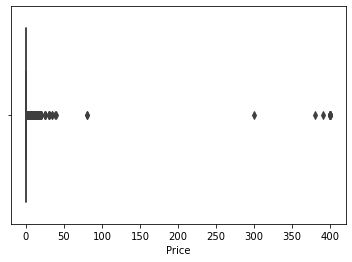

In [105]:
#4.a(i) Price Column - Price Outlier

import seaborn as sns
sns.boxplot(x=file['Price'])

In [106]:
#4.b(ii) As per above outlier There is no app in playstore that costs $200. But it is expected new app can be added inthat price.

In [107]:
#4.a(iii)(iv) limit records with price <$30 and replot 

file=file[file['Price']<30]

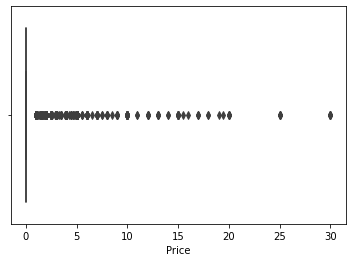

In [108]:
import seaborn as sns
sns.boxplot(x=file['Price'])

In [109]:
file.describe()

,Rating,Reviews,Size,Installs,Price
count,9338.000000,9.338000e+03,9338.000000,9.338000e+03,9338.000000
mean,4.191776,5.155891e+05,22725.789334,1.795108e+07,0.301915
std,0.515031,3.148627e+06,21310.340299,9.136965e+07,1.669887
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.890000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,6.011500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.247100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,29.990000


In [110]:
# Thus limited to price <30

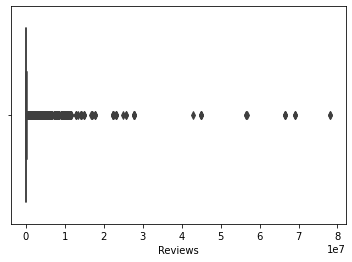

In [111]:
#4.b Reviews Column

import seaborn as sns
sns.boxplot(x=file['Reviews'])

In [112]:
# Its not clear clear because of range of data

# 4.b(ii) Minit data to apps <1 million reviews
file=file[file['Reviews']<1000000]

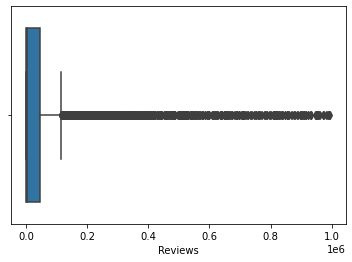

In [113]:
import seaborn as sns
sns.boxplot(x=file['Reviews'])

In [114]:
#4.c.i Installs- What is 95th Percentile of Installs

p95=(file.quantile([.95], axis = 0)['Installs'])
display(p95)
p95=p95.values[0]
print('95th Percentile of installs is '+str(p95))

0.95    10000000.0
Name: Installs, dtype: float64

95th Percentile of installs is 10000000.0


In [115]:
#4.c(ii) - drop records having value more than 95th percentile
file=file[file['Installs']<p95]

In [116]:
file

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.000000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


### Data Analysis to answer business questions

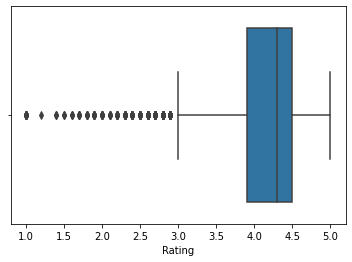

In [117]:
#5. Ditrbution of rating

import seaborn as sns
sns.boxplot(x=file['Rating'])

#### From above Plot it is evident that most of the ratings are more than 3.5. It implies that apps are performing good and have good amount of feedback from the users

In [118]:
#6 What are top Content Rating values?

#6.a,b Drop with few records.

file.describe()

,Rating,Reviews,Size,Installs,Price
count,7258.000000,7258.000000,7258.000000,7.258000e+03,7258.000000
mean,4.149959,19233.187655,20392.492106,7.932245e+05,0.386375
std,0.561834,47763.102974,20309.608936,1.482872e+06,1.882061
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,3.900000,85.000000,5300.000000,1.000000e+04,0.000000
50%,4.300000,1383.000000,15000.000000,1.000000e+05,0.000000
75%,4.500000,16394.000000,26000.000000,1.000000e+06,0.000000
max,5.000000,896118.000000,100000.000000,5.000000e+06,29.990000


In [119]:
#Top Content Rating:

tp = file.pivot_table(index=['Content Rating'], aggfunc='size')
print (tp)

Content Rating
Adults only 18+       3
Everyone           5913
Everyone 10+        249
Mature 17+          346
Teen                746
Unrated               1
dtype: int64


In [120]:
# Adults only 18+ and unrated are having very few records so will drop it
file=file[file['Content Rating']!='Unrated']
file=file[file['Content Rating']!='Adults only 18+']

#lets check

tp = file.pivot_table(index=['Content Rating'], aggfunc='size')
print (tp)
# thus top content rating wad displayed and few records were removed

Content Rating
Everyone        5913
Everyone 10+     249
Mature 17+       346
Teen             746
dtype: int64


#### Thus top Content rating values are displayed

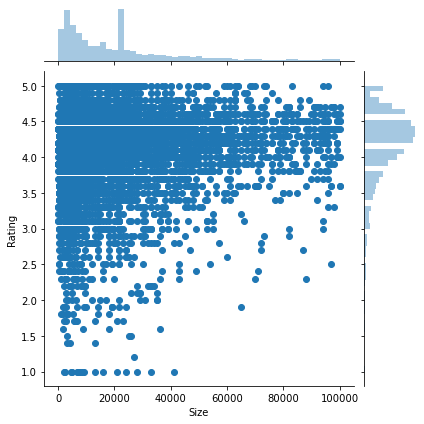

In [121]:
#7. Effect of size on rating

#7.a Joint Plot to understand the effect of size on rating
sns.jointplot(data=file, x="Size", y="Rating")

In [122]:
#7.b Pattern?
# Pattern is the most of the apps with less size are having High ratings. 
# Pattern is quite simple. Lesses the size of the app higher will be the rating.

In [123]:
#7.c explaination of the pattern?

# Most of the devices in which the app should be installed will have multiple applications. user may run out of memory sometimes
# If app size is big. Most of the user dont prefer to install. Even though app is small or large user will install if it is small app
# If user likes the app he will preserve the app else he will uninstall it. If user likes it definitely rating goes higher
# So size has an impact on the app rating

C:\Users\vishn\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


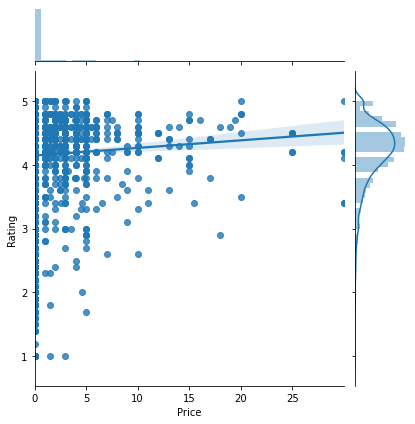

In [124]:
#8 Effect of Price on rating

#8.a Jointplot with regression line

sns.jointplot(data=file, x="Price", y="Rating", kind="reg")

In [125]:
## 8.b,c: pattern is quite simple. Lower the price, higher the rating is. 
#Explaination: Most of the users look for affordable apps. So if price is affordable most of the users can purchase


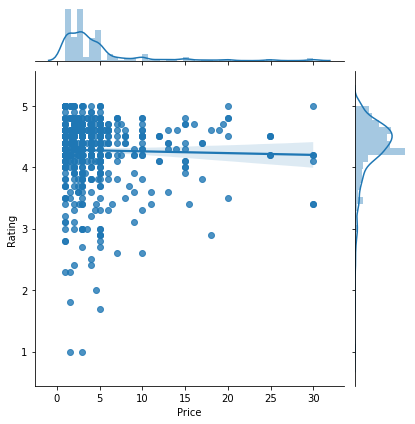

In [126]:
#8.d price>0

file=file[file['Price']>0]
sns.jointplot(data=file, x="Price", y="Rating", kind="reg")

In [127]:
#8.e,f Pattern is almost similar. But free apps have more top ratings. It means most of the users liked apps without any price.
# In termsof rating priced apps with less price are gaving better ratings

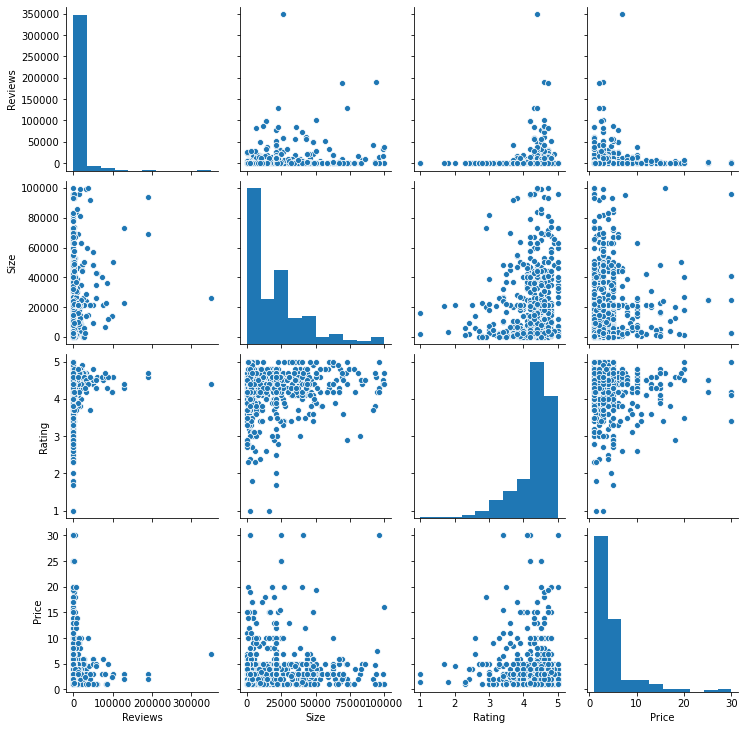

In [128]:
#9. Pairplot - 'Reviews','Size','Rating','Price'

pairpl=file[['Reviews','Size','Rating','Price']]
sns.pairplot(pairpl)

In [129]:
#10.a,b,c Rating vs Content rating

# Here i used mean as it will be better compared to others.

bp=file.groupby('Content Rating')[['Rating']].mean()
bp

,Rating
Content Rating,
Everyone,4.252930
Everyone 10+,4.312903
Mature 17+,4.412500
Teen,4.445455


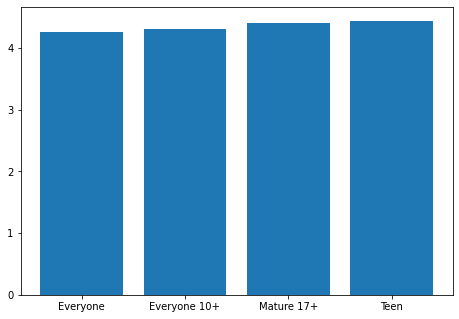

In [130]:
# Bar Plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bp.index,bp['Rating'])
plt.show()

In [131]:
#11. Content rating vs size vs rating - 3 variables at a time

In [132]:
#11.a  Create 5 buckets(20% in each) based on size
file.Size.describe()

count       620.000000
mean      20865.816805
std       21551.948337
min          14.000000
25%        3875.000000
50%       16000.000000
75%       27250.000000
max      100000.000000
Name: Size, dtype: float64

In [133]:
parts=['buck1','buck2','buck3','buck4','buck5']
bins=[0, 20000, 40000, 60000, 80000, 100000]
file['Bucket Size']=pd.cut(file['Size'],bins,labels=parts)
pd.pivot_table(file,values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
buck1,4.201597,4.323077,3.500,4.422222
buck2,4.312857,4.284615,4.440,4.688889
buck3,4.318750,4.100000,4.425,4.514286
buck4,4.447619,4.500000,NaN,4.200000
buck5,4.314286,4.550000,5.000,4.225000


In [135]:
import numpy as np
p20=pd.pivot_table(file, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
p20

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
buck1,3.90,4.14,3.5,4.24
buck2,4.10,4.14,4.2,4.56
buck3,4.04,3.98,4.1,4.32
buck4,4.20,4.50,NaN,4.02
buck5,4.26,4.46,5.0,3.96


In [ ]:
#20percentile of rating was displayed

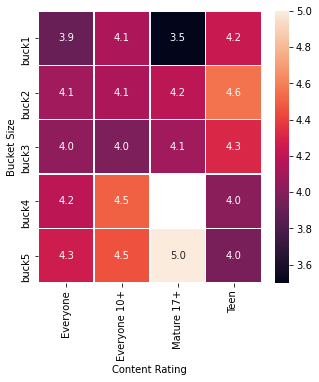

In [137]:
# Annotated Heatmap
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(p20, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

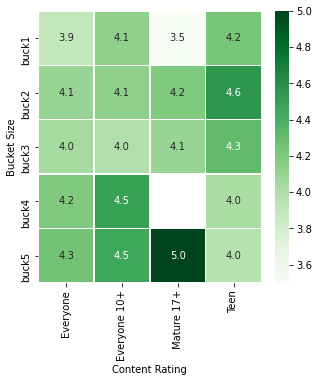

In [138]:
# Green Color Map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(p20, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()


In [ ]:
#Inference:
# Heavier apps are having higher ratings. so they are preferred most.
# Lighter apps are also doing good, As per above analysis Heavier apps are having edge over lighter apps but difference is not too big.